# CSME2 Bonus Point Assignment 1

<div style="text-align: right;font-size: 0.8em">Document Version 1.0.0, released 01/12/2021</div>
For detailed task instructions, please refer to the assignment PDF.

DO NOT CLEAR THE OUTPUT of the notebook you are submitting!

In [4]:
# Add any additional import you need in this cell
import numpy as np
from sklearn.cluster import kmeans_plusplus, KMeans
import matplotlib.pyplot as plt
import scipy.io
from itertools import combinations_with_replacement,chain
Filetrain_data = scipy.io.loadmat('sarcos_inv.mat')
Filetest_data = scipy.io.loadmat('sarcos_inv_test.mat')
np.random.seed(1234)

train_data = Filetrain_data['sarcos_inv']
test_data = Filetest_data['sarcos_inv_test']
np.random.shuffle(train_data)
datasize, jointdynamics = train_data.shape
trainsetsize = int(0.8*datasize)

### Setup
__Task A.1__ Load the data into the following numpy arrays. For the output, only use the first torque variable.
Randomly split the data from the file ```sarcos_inv.mat``` into a training set (80%) and a validation set (20%).

In [5]:
# Input and output training data
xs_train = train_data[:trainsetsize,:21]
ys_train = train_data[:trainsetsize,21:22]


# Input and output validation data
xs_valid = train_data[trainsetsize:,:21]
ys_valid = train_data[trainsetsize:,21:22]

# Input and output test data
xs_test = test_data[:,:21]
ys_test = test_data[:,21:22]

In [6]:
# Check for yourself 
# The following should lead to output 
# (35587, 21)
# (35587, 1)
# (8897, 21)
# (8897, 1)
# (4449, 21)
# (4449, 1)

print(xs_train.shape)
print(ys_train.shape)
print(xs_valid.shape)
print(ys_valid.shape)
print(xs_test.shape)
print(ys_test.shape)

(35587, 21)
(35587, 1)
(8897, 21)
(8897, 1)
(4449, 21)
(4449, 1)


__Task A.2__ Standardize the data such that
1. Training inputs have mean 0
2. Each training input variable has variance 1
3. The training outputs have mean 0
4. Apply the same transformation to the validation and test data

Implement this manually, i.e., do not use a ready scaler like the one provided by scikit-learn.

In [7]:
# Store the standardized data in the following variables 
xs_train_mean = xs_train.sum(axis=0)/(xs_train.shape[0])
xs_train_var = np.sqrt( (np.power( (xs_train[:] - xs_train_mean),2).sum(axis=0) )/xs_train.shape[0])
ys_train_mean = ys_train.sum(axis=0)/(ys_train.shape[0])
ys_train_var = np.sqrt( (np.power( (ys_train[:] - ys_train_mean),2).sum(axis=0) )/ys_train.shape[0])

xs_train_std = (xs_train-xs_train_mean)/xs_train_var
ys_train_std = (ys_train-ys_train_mean)/ys_train_var



xs_valid_mean = xs_valid.sum(axis=0)/(xs_valid.shape[0])
xs_valid_var = np.sqrt( (np.power( (xs_valid[:] - xs_valid_mean),2).sum(axis=0) )/xs_valid.shape[0])
ys_valid_mean = ys_valid.sum(axis=0)/(ys_valid.shape[0])
ys_valid_var = np.sqrt( (np.power( (ys_valid[:] - ys_valid_mean),2).sum(axis=0) )/ys_valid.shape[0])

xs_valid_std = (xs_valid-xs_valid_mean)/xs_valid_var
ys_valid_std = (ys_valid-ys_valid_mean)/ys_valid_var
print(ys_valid_std.shape)


xs_test_mean = xs_test.sum(axis=0)/(xs_test.shape[0])
xs_test_var = np.sqrt( (np.power( (xs_test[:] - xs_test_mean),2).sum(axis=0) )/xs_test.shape[0])
ys_test_mean = ys_test.sum(axis=0)/(ys_test.shape[0])
ys_test_var = np.sqrt( (np.power( (ys_test[:] - ys_test_mean),2).sum(axis=0) )/ys_test.shape[0])

xs_test_std = (xs_test-xs_test_mean)/xs_test_var
ys_test_std = (ys_test-ys_test_mean)/ys_test_var

(8897, 1)


In [8]:
# Check for yourself
# The following should lead to (roughly) six zeros and three arrays with (approximately) ones
print(np.mean(xs_train_std))
print(np.mean(ys_train_std))
print(np.mean(xs_valid_std))
print(np.mean(ys_valid_std))
print(np.mean(xs_test_std))
print(np.mean(ys_test_std))

print(np.var(xs_train_std, axis=0))
print(np.var(xs_valid_std, axis=0))
print(np.var(xs_test_std, axis=0))

1.7988736604700613e-17
5.450815378157961e-17
2.1639119481018053e-17
-9.583581914264586e-17
-2.7264507890483246e-17
-2.5553346307398523e-17
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


__Task A.3__

In [9]:
# Task A.3.a
# Implement a function estimating the variance
def my_variance(xs):
    """Calculate the empirical variance of a given vector of scalars
    
    Arguments
    xs      1d numpy array
    
    Returns
    The empirical variance of the provided vector
    """
    # Your implementation
    xs_mean = xs.sum(axis=0)/(xs.shape[0])
    xs_var = np.sqrt( (np.power( (xs[:] - xs_mean),2).sum(axis=0) )/xs.shape[0])
    return xs_var
    pass

In [10]:
# Task A.3.b
# Calculate the variance of ys_train_std using your function my_variance
var_ys_train = my_variance(ys_train_std)
print(var_ys_train)

[1.]


In [11]:
# Task A.3.c
# Implement a function calculating the SMSE between two 1d numpy arrays given a normalizing factor
def my_smse(z1, z2, s):
    """Calculate the Standardized Mean Squared Error (SMSE)
    
    Arguments
    z1      1d numpy array (usually the predictions)
    z2      1d numpy array (usually the test data)
    s       Normalization factor (usually the variance of the test data)
    
    Returns
    The SMSE of the provided data
    """
    # Your implementation
    SMSE =  (np.power( (z1 - z2),2).sum(axis=0)) / (z1.shape[0]*s)
    return SMSE
    pass

## Linear regression
### Simple linear regression
__Task A.4__

In [12]:
# This variable should contain the weights corresponding to simple linear regression (LS criterion, no bias term)
phi_valid = np.copy(xs_valid_std)
w_lr = (np.linalg.inv(phi_valid.T @ phi_valid) @ phi_valid.T ) @ ys_valid_std


# This variable should contain the predictions using w_lr on the test data
ys_pred_valid = phi_valid @ w_lr

# This should contain the resulting smse
smse_lr = my_smse(ys_pred_valid, ys_valid_std, var_ys_train)
print(smse_lr)

[0.07045398]


### Linear regression with polynomial features
__Task A.5__

In [13]:
# Task A.5.a
def my_poly_features(xs, degree):
    """Generates polynomial features from given data
    
    The polynomial features should include monomials (i.e., x_i, x_i**2 etc)
    and interaction terms (x_1*x_2 etc), but no repetitions.
    The order of the samples should not be changed through the transformation.
    
    Arguments
    xs      2d numpy array of shape (N,D) containing N samples of dimension D
    degree  Maximum degree of polynomials to be considered
    
    Returns
    An (N,M) numpy array containing the transformed input
    """
    # Your implementation
    NN,DD = xs.shape
    sol = np.ones((NN))
    element_col = np.ones((NN,1))
    dimm = xs.shape[1]
    powe = degree
    arr = np.copy(xs)
    st = 0
    N_data,D = np.shape(xs) 
    output = np.ones((N_data,1))
    n_array = list(range(D))
    indices = []
    for i in range(1,degree+1):
        comb = list(combinations_with_replacement(n_array, i))
        indices.append(comb)
    indices = list(chain(*indices))
    for x_i in indices:
        output_term = np.ones((N_data,1))
        for term in x_i:
            xs_current = xs[:,term].reshape(N_data,1)
            output_term = xs_current*output_term
        output = np.append(output,output_term,axis=1)  
    return output
    pass

In [14]:
# Tasks A.5.b
# This variable should contain the weights corresponding to linear regression using polynomial features up to degree 2 and 3
phi_poly2 = my_poly_features(xs_valid_std,2)
w_poly2 = (np.linalg.inv(phi_poly2.T @ phi_poly2) @ phi_poly2.T ) @ ys_valid_std

phi_poly3 = my_poly_features(xs_valid_std,3)
w_poly3 = (np.linalg.inv(phi_poly3.T @ phi_poly3) @ phi_poly3.T ) @ ys_valid_std

# This variable should contain the predictions using w_poly2 and w_poly3 on the validation data
ys_pred_poly2_valid = phi_poly2 @ w_poly2
ys_pred_poly3_valid = phi_poly3 @ w_poly3

# This should contain the resulting smse
smse_poly2 = my_smse(ys_pred_poly2_valid, ys_valid_std, var_ys_train)
smse_poly3 = my_smse(ys_pred_poly3_valid, ys_valid_std, var_ys_train)
print(smse_poly2)
print(smse_poly3)

[0.03075771]
[0.0103944]


## Clustering
__Task B.1__ Implement the basic $K$-Means algorithm.

In [15]:
def my_kmeans(xs, init_centers, n_iter):
    """Runs the K-Means algorithm from a given initialization
    
    Arguments
    xs            2d numpy array of shape (N,D) containing N samples of dimension D
    init_centers  2d numpy array of shape (K,D) containing the initial cluster centers
    n_iter        Number of iterations of the K-Means algorithm
    
    Returns
    An (K,D) numpy array containing the final cluster centers
    """
    # Your implementation
    N,D = xs.shape
    K = init_centers.shape[0]
    new_centers = np.zeros((K,D))
    new_centers = np.copy(init_centers)
    dist = np.zeros((K,N))
    for iteration in range(n_iter):
        for k in range(K):
            for n in range(N):
                dist[k,n] = np.linalg.norm(new_centers[k] - xs[n])
        closestK = np.argmin(dist,0)
        for k in range(K):
            new_centers[k] = np.average(xs[closestK == k],0 )
    
    return new_centers
    pass

__Task B.2__ Generate test data set and plot it.

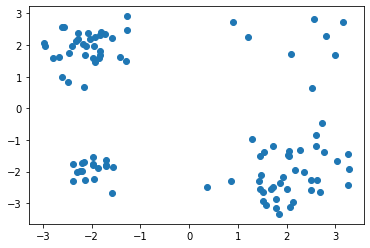

In [18]:
# Test data of shape (100,2)
point,Dim = 100,2

prob = np.array([0.3,0.2,0.4,0.1])
means = np.array([[-2,2],[-2,-2],[2,-2],[2,2]])
xs_cluster_test = np.zeros((point,Dim))
cov1 = 0.2*np.eye((Dim))
cov2 = 0.2*np.eye((Dim))
cov3 = 0.5*np.eye((Dim))
cov4 = 0.5*np.eye((Dim))

covariance = np.array([cov1,cov2,cov3,cov4])
index = np.random.choice(means[:,0].size,point,p = prob)
for ele,i in enumerate(index):
    xs_cluster_test[ele,:] = np.random.multivariate_normal (means[i], covariance[i],(1))
    
plt.scatter(xs_cluster_test[:,0],xs_cluster_test[:,1])

# __Task B.3__ Run your $K$-Means algorithm on the test data for $K=2,3,4,5$ clusters and plot the final cluster centers.

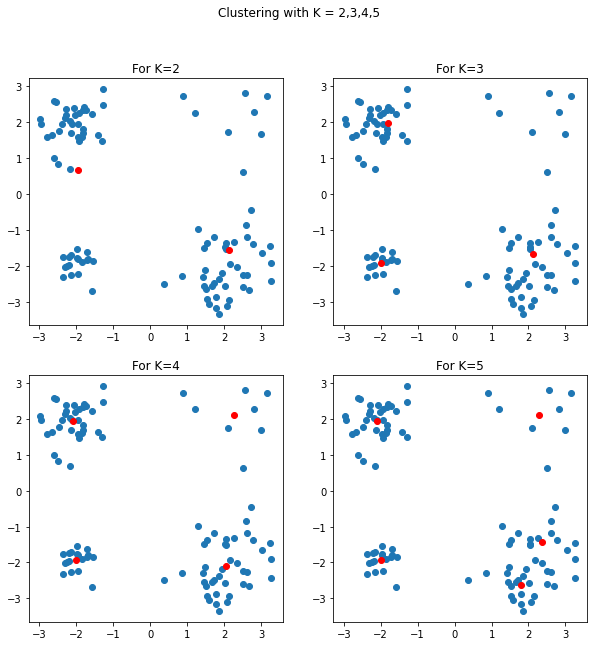

In [19]:
# Use kmeans_plusplus(xs_cluster_test, K, random_state=0) for initialization
K = 2
fig, sct_graph = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Clustering with K = 2,3,4,5')
for k in range(2,6):
    init_centers,init_cent_index = kmeans_plusplus(xs_cluster_test, k, random_state=0)
    new_centers = my_kmeans(xs_cluster_test,init_centers,5)
    sct_graph[int((k/2)-1),k%2].scatter(xs_cluster_test[:,0],xs_cluster_test[:,1])
    sct_graph[int((k/2)-1),k%2].scatter(new_centers[:,0], new_centers[:,1], c='red')
    sct_graph[int((k/2)-1),k%2].set_title(f'For K={k}')


## Radial Basis Function Network
__Task C.1__ Find $K=100$ cluster centers using $K$-Means.

In [20]:
# This 100x21 numpy array should contain the cluster centers
def centersFunc(xs,K):
    kmeansReturn = KMeans(n_clusters = K,init="k-means++",random_state=0).fit(xs)
    xs_centers = kmeansReturn.cluster_centers_
    return xs_centers
K=100
xs_centers = centersFunc(xs_train_std,K)

__Task C.2__ Implement the Gaussian basis functions and transform the data accordingly

In [21]:
def my_gaussFunc(xs):
    sigma = 25.0
    const = (2*np.pi*(sigma**2))**(-0.5)
    K = xs_centers.shape[0]
    N,D = xs.shape 
    r = np.zeros((N,K))
    for k in range(K):
        for n in range(N):
            r[n,k] = np.linalg.norm(xs[n,:] - xs_centers[k,:])
    xs_gauss = const* np.exp(- ( (r**2) / (2*sigma**2) ))
    identi = np.ones((xs.shape[0],1))
    xs_gauss = np.column_stack((identi,xs_gauss))
    return xs_gauss


__Task C.3__ Run simple linear regression on the transformed data and evaluate it on the test set

In [22]:
xs_train_gauss = my_gaussFunc(xs_train_std)
xs_valid_gauss = my_gaussFunc(xs_valid_std)

weights = np.linalg.pinv(xs_train_gauss) @ ys_train_std

ys_pred_gauss_valid = xs_valid_gauss @ weights
var_ys_valid = my_variance(ys_valid_std)

# This should contain the corresponding SMSE
smse_gauss = my_smse(ys_pred_gauss_valid, ys_valid_std, var_ys_train)
print(smse_gauss)

[0.04219284]


__Open task__ Can you improve the performance of the RBF network?

__Task C.4__ Evaluate your final model (either the one from Task C.3 or your improved model from the open task) on the test data

In [23]:
# This should contain the predictions on the test data set
xs_test_gauss = my_gaussFunc(xs_test_std)
ys_pred_test = xs_test_gauss @ weights
var_ys_test = my_variance(ys_test_std)

# This should contain the resulting SMSE on the test data
smse_test = my_smse(ys_pred_test, ys_test_std, var_ys_test)
print(smse_test)

[0.04252021]
